# NUMBER RECOGNITION

In [196]:
# importing required libraries 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [197]:
#load the dataset

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

## ABOUT MNIST DATASET

The MNIST dataset is a widely-used dataset in the field of machine learning and computer vision. It stands for Modified National Institute of Standards and Technology database.The MNIST dataset consists of 28x28 pixel grayscale images of handwritten digits (0 through 9), along with corresponding labels indicating the digit represented in each image. It is widely used for training and testing machine learning models, particularly in image classification tasks. The dataset is well-known for its simplicity and has become a standard benchmark for evaluating the performance of various algorithms in the field of machine learning and computer vision.

In [198]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### DATA PREPROCESSING AND VISUALIZATION

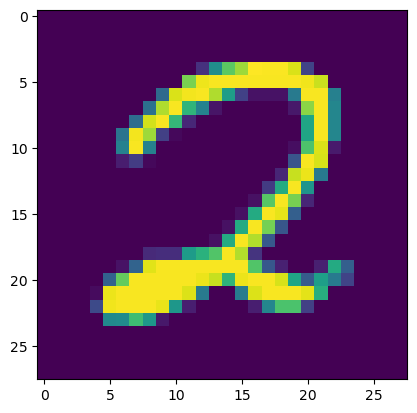

In [199]:
plt.imshow(x_test[35])

In [200]:
# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

In [201]:
# displaying the pixel value of normalized data

x_train[25]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [202]:
model = Sequential([
    Flatten(input_shape=(28, 28)), # Flatten the 28x28 images into a 1D array
    Dense(128, activation='relu'), # Hidden layer with 128 units and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 units (for 0-9 digits) and softmax activation
])


In [203]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dense_27 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [204]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [205]:
# Train the model
history = model.fit(x_train, y_train,batch_size =64,epochs = 20,verbose=1,validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 8s 8ms/step - loss: 0.3313 - accuracy: 0.9054 - val_loss: 0.1792 - val_accuracy: 0.9500
Epoch 2/20
750/750 [==============================] - 6s 8ms/step - loss: 0.1491 - accuracy: 0.9570 - val_loss: 0.1287 - val_accuracy: 0.9635
Epoch 3/20
750/750 [==============================] - 6s 8ms/step - loss: 0.1038 - accuracy: 0.9701 - val_loss: 0.1053 - val_accuracy: 0.9699
Epoch 4/20
750/750 [==============================] - 6s 8ms/step - loss: 0.0786 - accuracy: 0.9772 - val_loss: 0.0998 - val_accuracy: 0.9717
Epoch 5/20
750/750 [==============================] - 6s 8ms/step - loss: 0.0614 - accuracy: 0.9818 - val_loss: 0.0899 - val_accuracy: 0.9727
Epoch 6/20
750/750 [==============================] - 6s 8ms/step - loss: 0.0491 - accuracy: 0.9861 - val_loss: 0.0931 - val_accuracy: 0.9716
Epoch 7/20
750/750 [==============================] - 7s 9ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0847 - val_accuracy: 0.9743
Epoch 

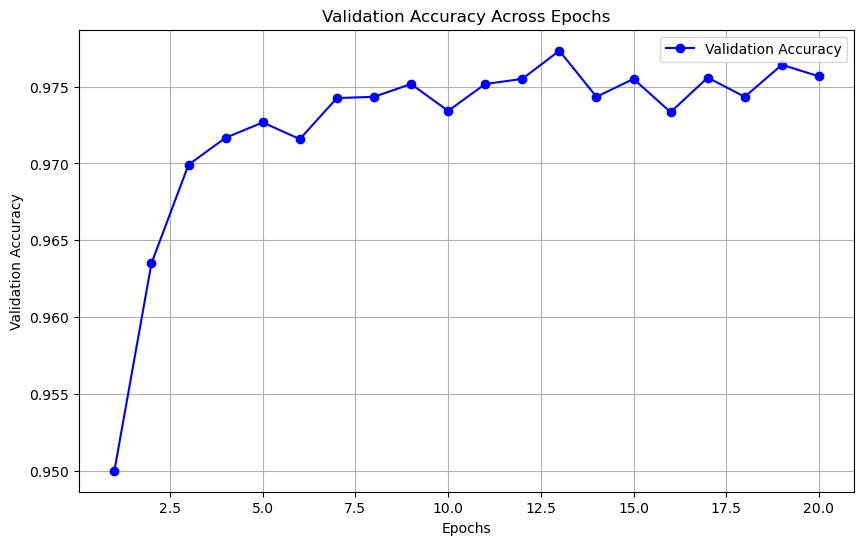

In [206]:
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Extracting the number of epochs
epochs = range(1, len(val_accuracy) + 1)

# Plotting validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_accuracy, marker='o', linestyle='-', color='b', label='Validation Accuracy')
plt.title('Validation Accuracy Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()


In [210]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)

313/313 [==============================] - 1s 4ms/step


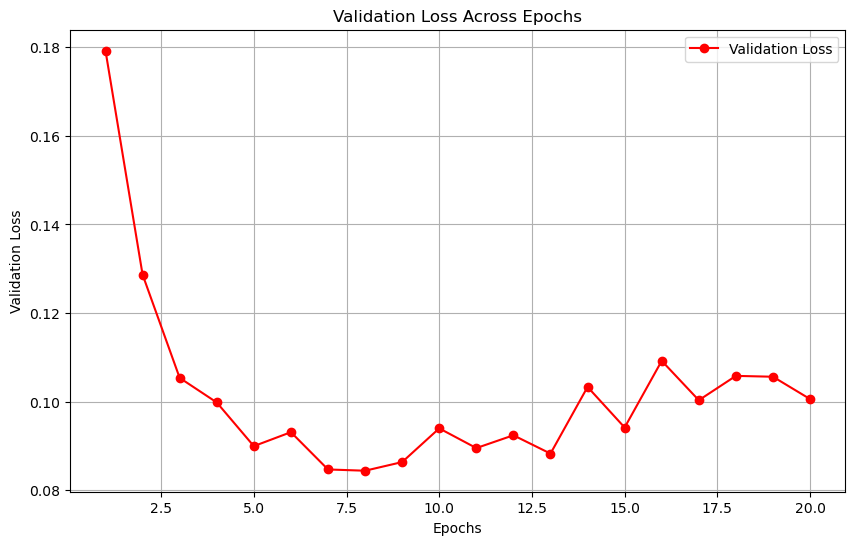

In [207]:
# plotting validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_loss, marker='o', linestyle='-', color='r', label='Validation Loss')
plt.title('Validation Loss Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

(-0.5, 27.5, 27.5, -0.5)

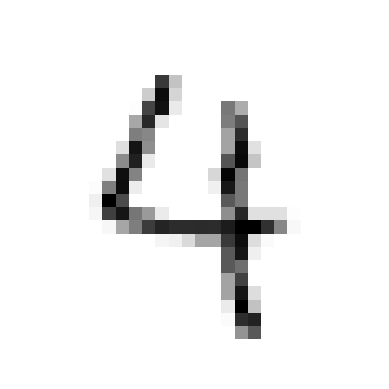

In [208]:
plt.imshow(x_test[24],cmap="binary")
plt.axis("off")

In [211]:
y = model.predict(np.array(x_test[24]))
y = np.argmax(y,axis=1)
print(f"predicted number is",y)

1/1 [==============================] - 0s 140ms/step
predicted number is [4]


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy}")

# Saving the model
model.save('mnist_number_recognition_model.h5')